<a href="https://colab.research.google.com/github/ayush-kaurav0512/Santander-Customer-Satisfaction/blob/main/Santander_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import the necesaary library and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive
drive.mount('/content/drive')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import tree


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data from the csv file

train_df=pd.read_csv('/content/drive/MyDrive/machine_learning_dataset/Santander Customer Satisfaction - TRAIN.csv')
train_df.tail()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [ ]:
# Check for null values
train_df.isnull().sum()

,0
ID,0
var3,0
var15,0
imp_ent_var16_ult1,0
imp_op_var39_comer_ult1,0
...,...
saldo_medio_var44_hace3,0
saldo_medio_var44_ult1,0
saldo_medio_var44_ult3,0
var38,0


In [ ]:
Categorical_columns=train_df.select_dtypes(include=['object']).columns
Numeerical_columns=train_df.select_dtypes(exclude=['object']).columns
print(Numeerical_columns)

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)


<Axes: >

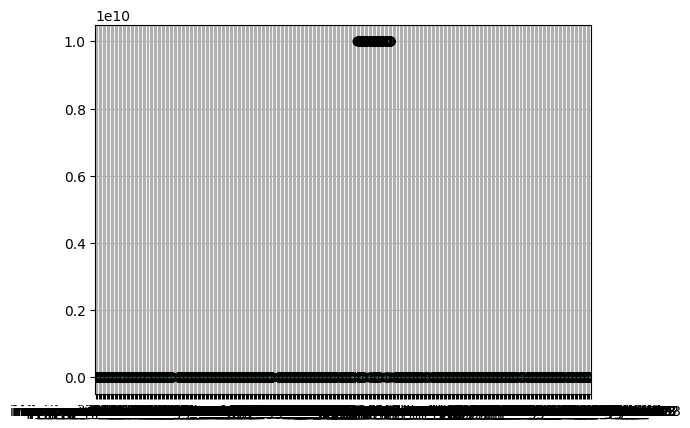

In [ ]:
# check for outliers

train_df.boxplot()

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'var3'}>,
        <Axes: title={'center': 'var15'}>,
        <Axes: title={'center': 'imp_ent_var16_ult1'}>,
        <Axes: title={'center': 'imp_op_var39_comer_ult1'}>,
        <Axes: title={'center': 'imp_op_var39_comer_ult3'}>,
        <Axes: title={'center': 'imp_op_var40_comer_ult1'}>,
        <Axes: title={'center': 'imp_op_var40_comer_ult3'}>,
        <Axes: title={'center': 'imp_op_var40_efect_ult1'}>,
        <Axes: title={'center': 'imp_op_var40_efect_ult3'}>,
        <Axes: title={'center': 'imp_op_var40_ult1'}>,
        <Axes: title={'center': 'imp_op_var41_comer_ult1'}>,
        <Axes: title={'center': 'imp_op_var41_comer_ult3'}>,
        <Axes: title={'center': 'imp_op_var41_efect_ult1'}>,
        <Axes: title={'center': 'imp_op_var41_efect_ult3'}>,
        <Axes: title={'center': 'imp_op_var41_ult1'}>,
        <Axes: title={'center': 'imp_op_var39_efect_ult1'}>,
        <Axes: title={'center': 'imp_op_var39_

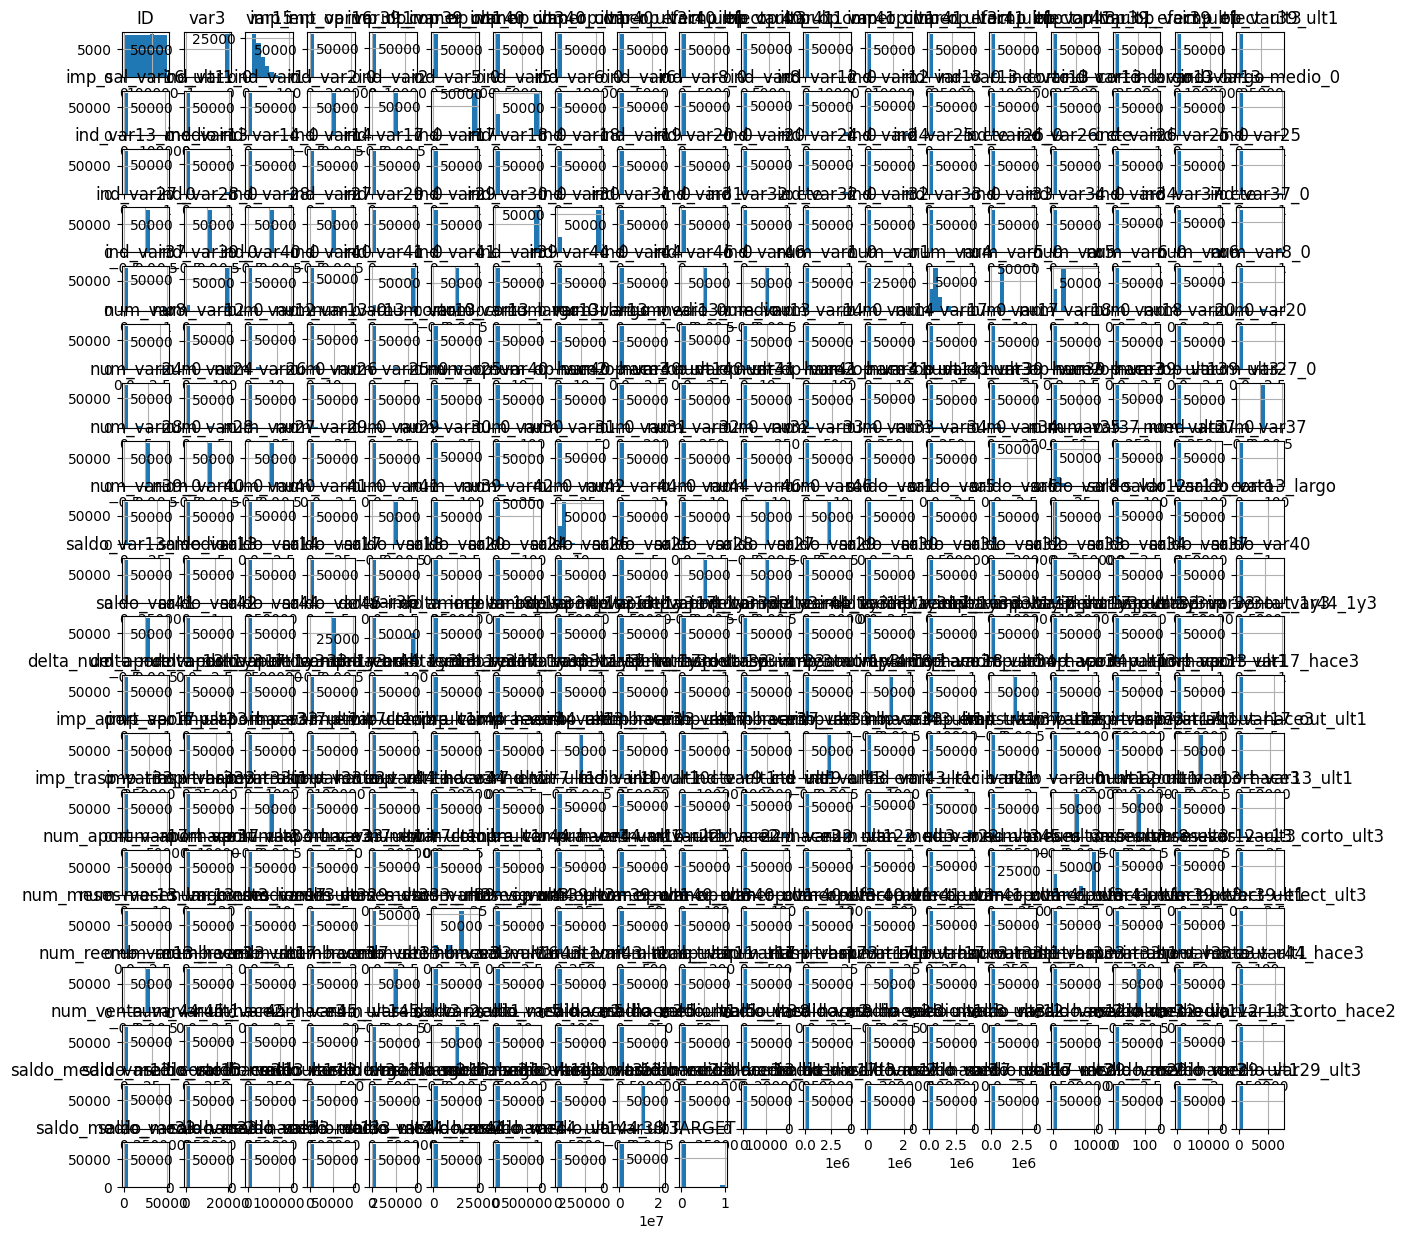

In [ ]:
#check for value distribution

train_df.hist(figsize=(15,15))

In [ ]:
# Chekck if the dataset is balanced or not

train_df['TARGET'].value_counts()

,count
TARGET,
0,73012
1,3008


In [ ]:
# Balance the dataset
# scaler=StandardScaler()
# train_df=scaler.fit_transform(train_df)
# train_df=pd.DataFrame(train_df)
print(train_df.head())


   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

In [ ]:
#define the feature

X=train_df.drop(columns=['TARGET','ID'])
y=train_df['TARGET']


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

In [ ]:
# Split into training and testing dataset #Decision Tree1

X_train,X_test,Y_train,Y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

dt_model=DecisionTreeClassifier(criterion="entropy", max_depth=40, max_leaf_nodes=400, max_features=40)
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)

In [ ]:
# Decision Tree2

X_train,X_test,Y_train,Y_test=train_test_split(X_res,y_res,test_size=0.4,random_state=12)

dt_model=DecisionTreeClassifier(criterion="entropy", max_depth=30, max_leaf_nodes=300, max_features=30)
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)

In [ ]:
# Decision Tree3

X_train,X_test,Y_train,Y_test=train_test_split(X_res,y_res,test_size=0.6,random_state=30)

dt_model=DecisionTreeClassifier(criterion="gini", max_depth=20, max_leaf_nodes=250, max_features=25)
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)

In [ ]:
# Decision Tree4

X_train,X_test,Y_train,Y_test=train_test_split(X_res,y_res,test_size=0.8,random_state=24)

dt_model=DecisionTreeClassifier(criterion="gini", max_depth=60, max_leaf_nodes=500, max_features=60)
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)

In [ ]:
# test the data in the already train model
new_data=pd.read_csv('/content/drive/MyDrive/machine_learning_dataset/Santander Customer Satisfaction - TEST-Without TARGET.csv')
new_data1=new_data.copy()
new_data=new_data.drop(columns=['ID'])
new_data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
new_pred=dt_model.predict(new_data)

new_pred_df=pd.DataFrame(new_pred,columns=['TARGET'])

## concat the new data and new_pred
new_df1=new_data1[['ID']]
sub_pred_df=pd.concat([new_df1,new_pred_df], axis=1)
sub_pred_df.to_csv('/content/drive/MyDrive/machine_learning_dataset/submission.csv',index=False)
sub_pred_df.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


[Text(0.5196605320545393, 0.9782608695652174, 'x[280] <= 2.5\ngini = 0.5\nsamples = 29204\nvalue = [14571.0, 14633.0]'),
 Text(0.22073408917682927, 0.9347826086956522, 'x[1] <= 25.5\ngini = 0.436\nsamples = 19097\nvalue = [6137, 12960]'),
 Text(0.3701973106156843, 0.9565217391304348, 'True  '),
 Text(0.03373983739837398, 0.8913043478260869, 'x[324] <= 0.5\ngini = 0.371\nsamples = 3053\nvalue = [2302, 751]'),
 Text(0.01978319783197832, 0.8478260869565217, 'x[63] <= 0.5\ngini = 0.325\nsamples = 2576\nvalue = [2050, 526]'),
 Text(0.012466124661246613, 0.8043478260869565, 'x[164] <= 0.0\ngini = 0.358\nsamples = 2139\nvalue = [1639, 500]'),
 Text(0.010298102981029811, 0.7608695652173914, 'x[79] <= 0.5\ngini = 0.294\nsamples = 1996\nvalue = [1639, 357]'),
 Text(0.004336043360433604, 0.717391304347826, 'x[154] <= 0.5\ngini = 0.367\nsamples = 363\nvalue = [275, 88]'),
 Text(0.002168021680216802, 0.6739130434782609, 'gini = 0.274\nsamples = 329\nvalue = [275, 54]'),
 Text(0.0065040650406504065,

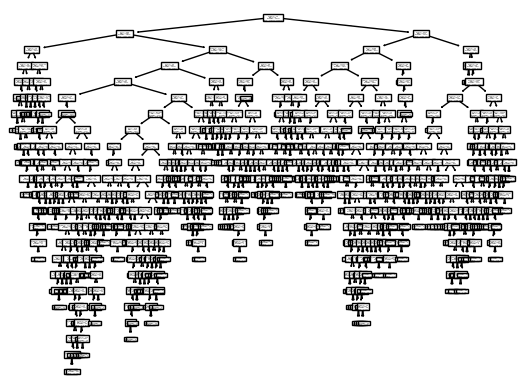

In [ ]:
# Print decision Tree
tree.plot_tree(dt_model)

Top 3 important Feature                  Feature  Importance
280  num_meses_var5_ult3    0.329493
1                  var15    0.158807
190          saldo_var42    0.071870 

Least 3 important Feature                Feature  Importance
172        saldo_var14         0.0
170  saldo_var13_medio         0.0
184        saldo_var32         0.0 


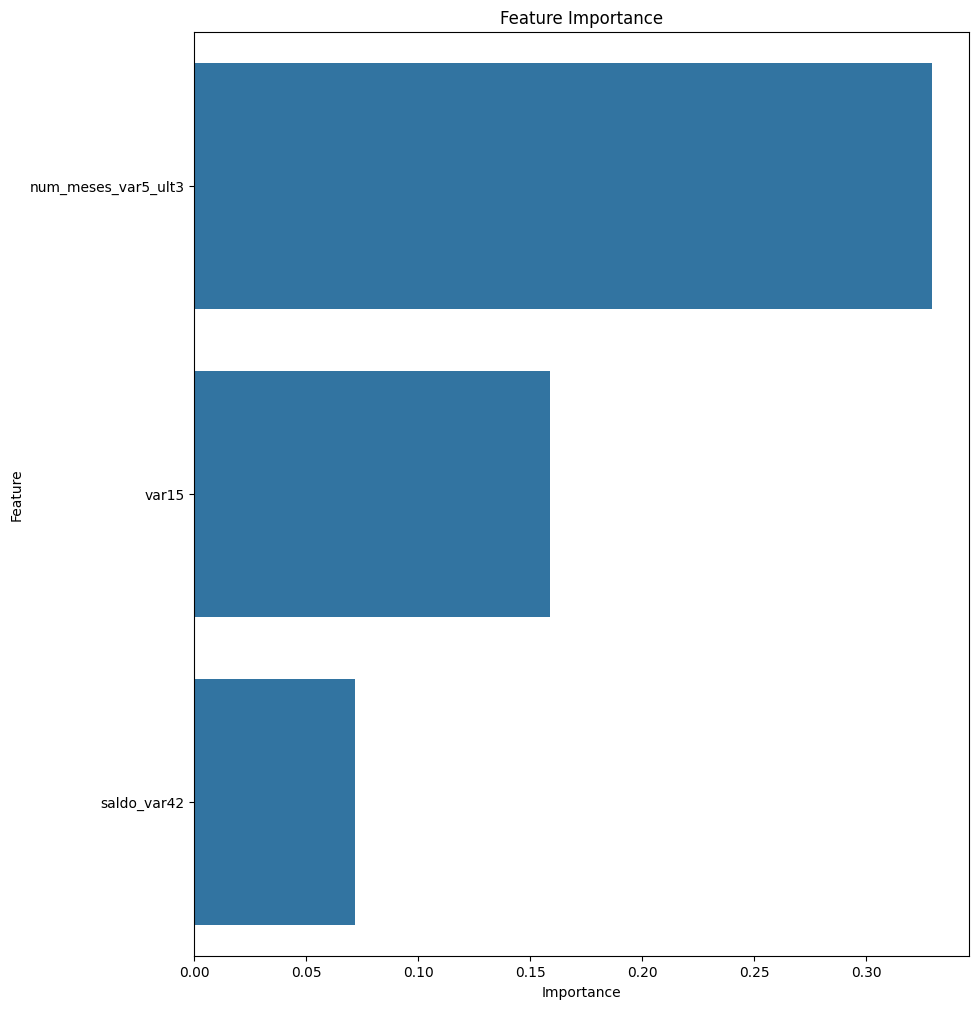

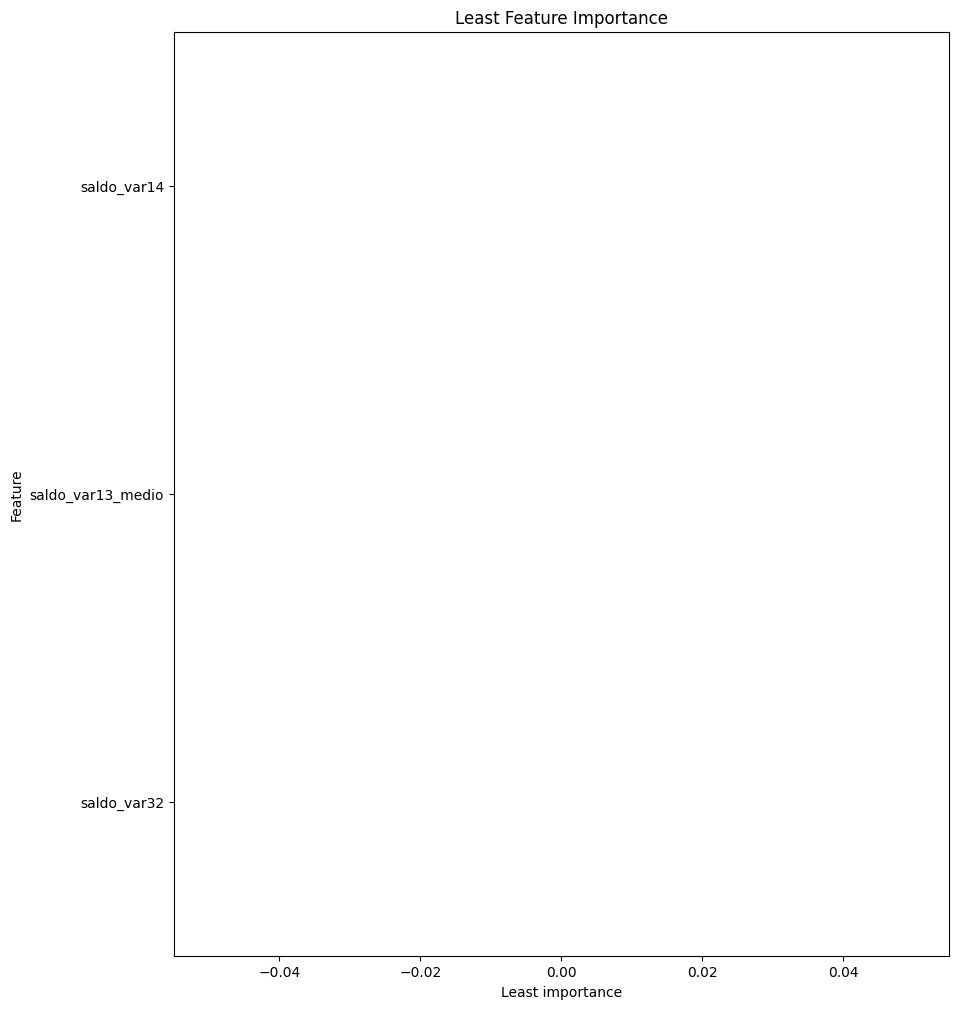

In [ ]:
# Feature Importance

feature_importance=dt_model.feature_importances_

feature_importance_Df=pd.DataFrame(
    {'Feature':X.columns,
    'Importance':feature_importance}
)

feature_importance_Df=feature_importance_Df.sort_values(by='Importance',ascending=False)
important_feature=feature_importance_Df.head(3)
NI_feature=feature_importance_Df.tail(3)
print(f"Top 3 important Feature {important_feature} ")
print(f"\nLeast 3 important Feature {NI_feature} ")

#plot the feature

plt.figure(figsize=(10,12))
sns.barplot(x='Importance',y='Feature',data=important_feature)
plt.title('Feature Importance')
plt.show()

plt.figure(figsize=(10,12))
sns.barplot(x='Importance',y='Feature',data=NI_feature)
plt.title('Least Feature Importance')
plt.xlabel('Least importance')
plt.ylabel('Feature')
plt.show()